This script uses data from the 'student_scores.csv' file which contains data on the number of hours a student has studied, compared to their score on a test. I displayed this data using the Pandas library. I then displayed the data using the matplotlib library. Then I used SkLearn to train a linear regression model, as well as splitting the data into training data and test data. After being trained, the model was tested, the outcome of this is also displayed using various charts from matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
dataset = pd.read_csv('student_scores.csv')
dataset.shape
dataset.describe()

,Hours,Scores
count,100.000000,100.000000
mean,5.012000,51.480000
std,2.486541,24.900805
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


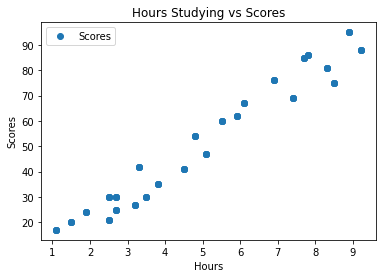

In [4]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours Studying vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

C:\Users\timah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

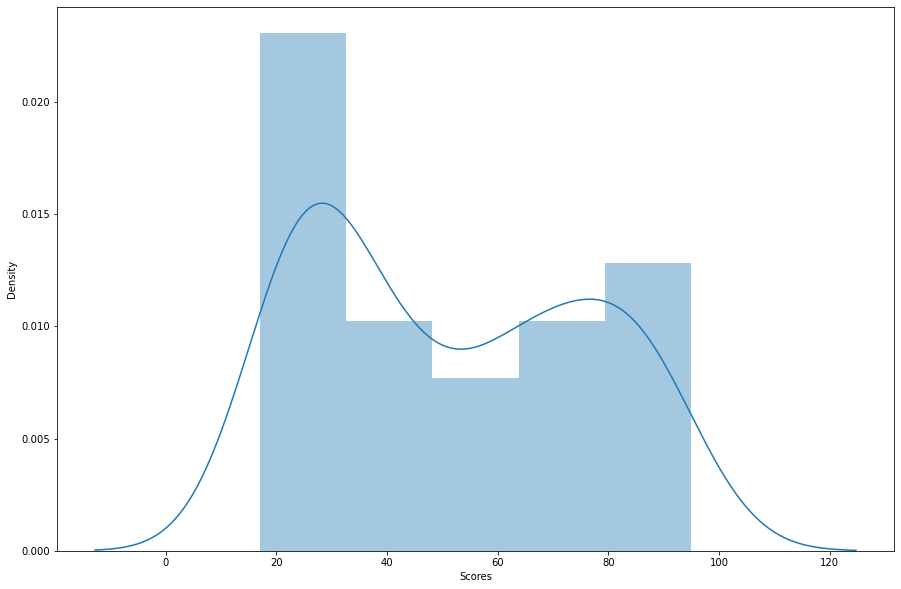

In [5]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['Scores'])

In [6]:
X = dataset['Hours'].values.reshape(-1,1)
y = dataset['Scores'].values.reshape(-1,1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
regressor = LinearRegression()
regressor.fit(X_train, y_train) 

LinearRegression()

In [9]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[2.01754335]
[[9.89749079]]


In [10]:
y_pred = regressor.predict(X_test)

In [11]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,47,52.494746
1,62,60.412739
2,27,33.689514
3,20,16.863780
4,21,26.761270
5,67,62.392237
6,30,26.761270
7,76,70.310230
8,30,36.658761
9,30,28.740768


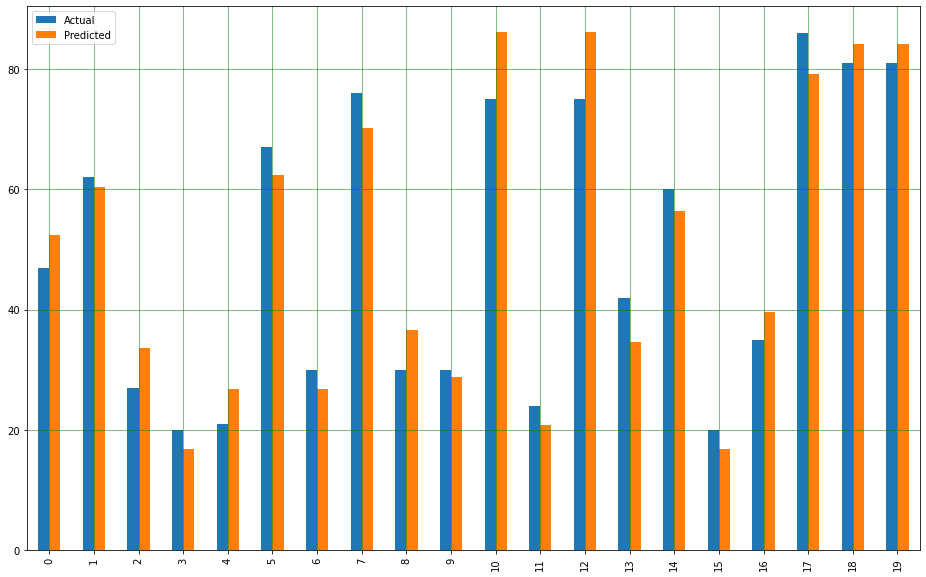

In [12]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

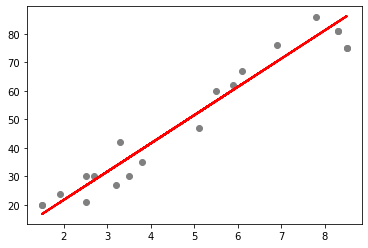

In [13]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [14]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,
y_pred)))

Mean Absolute Error: 5.066980356737142
Mean Squared Error: 32.62774958689868
Root Mean Squared Error: 5.712070516625182
